# **Decoding Driver Performance in F1 History**

## Problem Definition

This project analyzes historical Formula 1 race results (1950–2024) to uncover key performance patterns among drivers and teams. Using the `results.csv` dataset, we aim to:

* Identify the **top 10 drivers** by total points
* Evaluate **team efficiency** (points per race start)
* Analyze **DNF trends** and common failure causes
* Find **drivers who lost the most positions** during races
* Compare **driver performance across decades**

The goal is to extract actionable insights to support strategic decisions for teams, analysts, and media professionals through data cleaning, feature engineering, statistical analysis, and visual storytelling.

---

### `imports`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### `load data`

In [2]:
os.getcwd()

'c:\\Users\\laphouse\\Projects\\MIA\\MIA_phase1\\Block2\\task2.1'

In [ ]:
results_df = pd.read_csv(os.path.join(os.getcwd(), "dataset", "results.csv"))
results_df.head(10)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
5,6,18,6,3,8,13,6,6,6,3.0,57,\N,\N,50,14,1:29.639,212.974,11
6,7,18,7,5,14,17,7,7,7,2.0,55,\N,\N,54,8,1:29.534,213.224,5
7,8,18,8,6,1,15,8,8,8,1.0,53,\N,\N,20,4,1:27.903,217.180,5
8,9,18,9,2,4,2,\N,R,9,0.0,47,\N,\N,15,9,1:28.753,215.100,4
9,10,18,10,7,12,18,\N,R,10,0.0,43,\N,\N,23,13,1:29.558,213.166,3


In [4]:
results_df.shape

(26759, 18)

In [5]:
status_df = pd.read_csv(os.path.join(os.getcwd(), "dataset", "status.csv"))
status_df.head(10)

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
5,6,Gearbox
6,7,Transmission
7,8,Clutch
8,9,Hydraulics
9,10,Electrical


In [6]:
drivers_df = pd.read_csv(os.path.join(os.getcwd(), "dataset", "drivers.csv"))
drivers_df.head(10)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
5,6,nakajima,\N,NAK,Kazuki,Nakajima,1985-01-11,Japanese,http://en.wikipedia.org/wiki/Kazuki_Nakajima
6,7,bourdais,\N,BOU,Sébastien,Bourdais,1979-02-28,French,http://en.wikipedia.org/wiki/S%C3%A9bastien_Bo...
7,8,raikkonen,7,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
8,9,kubica,88,KUB,Robert,Kubica,1984-12-07,Polish,http://en.wikipedia.org/wiki/Robert_Kubica
9,10,glock,\N,GLO,Timo,Glock,1982-03-18,German,http://en.wikipedia.org/wiki/Timo_Glock


In [7]:
constructors_df = pd.read_csv(os.path.join(os.getcwd(), "dataset", "constructors.csv"))
constructors_df.head(10)

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
5,6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
6,7,toyota,Toyota,Japanese,http://en.wikipedia.org/wiki/Toyota_Racing
7,8,super_aguri,Super Aguri,Japanese,http://en.wikipedia.org/wiki/Super_Aguri_F1
8,9,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing
9,10,force_india,Force India,Indian,http://en.wikipedia.org/wiki/Racing_Point_Forc...


In [8]:
results_df['statusId'].nunique()

137

In [9]:
status_df['statusId'].nunique()

139

In [10]:
results_df["driverId"].nunique()

861

In [11]:
drivers_df["driverId"].nunique()

861

In [12]:
drivers_name = drivers_df[["driverId", "forename", "surname"]]
drivers_name

,driverId,forename,surname
0,1,Lewis,Hamilton
1,2,Nick,Heidfeld
2,3,Nico,Rosberg
3,4,Fernando,Alonso
4,5,Heikki,Kovalainen
...,...,...,...
856,858,Logan,Sargeant
857,859,Liam,Lawson
858,860,Oliver,Bearman
859,861,Franco,Colapinto


In [13]:
drivers_df["full_name"] = drivers_df["forename"] + " " + drivers_df["surname"]
drivers_name = drivers_df[["driverId", "full_name"]]
drivers_name

,driverId,full_name
0,1,Lewis Hamilton
1,2,Nick Heidfeld
2,3,Nico Rosberg
3,4,Fernando Alonso
4,5,Heikki Kovalainen
...,...,...
856,858,Logan Sargeant
857,859,Liam Lawson
858,860,Oliver Bearman
859,861,Franco Colapinto


In [14]:
constructors_df['constructorId'].nunique()

212

In [15]:
constructors_df = constructors_df[["constructorId", "name", 'nationality']]
constructors_df

,constructorId,name,nationality
0,1,McLaren,British
1,2,BMW Sauber,German
2,3,Williams,British
3,4,Renault,French
4,5,Toro Rosso,Italian
...,...,...,...
207,210,Haas F1 Team,American
208,211,Racing Point,British
209,213,AlphaTauri,Italian
210,214,Alpine F1 Team,French


### `inner merge`

In [16]:
df_merged = pd.merge(left=results_df, right=status_df, on='statusId', how='inner')
df_merged = pd.merge(left=df_merged, right=drivers_name, on='driverId', how='inner')
df_merged = pd.merge(left=df_merged, right=constructors_df, on='constructorId', how='inner')

df_merged.head(10)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,status,full_name,name,nationality
0,1,18,1,1,22,1,1,1,1,10.0,...,5690616,39,2,1:27.452,218.300,1,Finished,Lewis Hamilton,McLaren,British
1,2,18,2,2,3,5,2,2,2,8.0,...,5696094,41,3,1:27.739,217.586,1,Finished,Nick Heidfeld,BMW Sauber,German
2,3,18,3,3,7,7,3,3,3,6.0,...,5698779,41,5,1:28.090,216.719,1,Finished,Nico Rosberg,Williams,British
3,4,18,4,4,5,11,4,4,4,5.0,...,5707797,58,7,1:28.603,215.464,1,Finished,Fernando Alonso,Renault,French
4,5,18,5,1,23,3,5,5,5,4.0,...,5708630,43,1,1:27.418,218.385,1,Finished,Heikki Kovalainen,McLaren,British
5,6,18,6,3,8,13,6,6,6,3.0,...,\N,50,14,1:29.639,212.974,11,+1 Lap,Kazuki Nakajima,Williams,British
6,7,18,7,5,14,17,7,7,7,2.0,...,\N,54,8,1:29.534,213.224,5,Engine,Sébastien Bourdais,Toro Rosso,Italian
7,8,18,8,6,1,15,8,8,8,1.0,...,\N,20,4,1:27.903,217.180,5,Engine,Kimi Räikkönen,Ferrari,Italian
8,9,18,9,2,4,2,\N,R,9,0.0,...,\N,15,9,1:28.753,215.100,4,Collision,Robert Kubica,BMW Sauber,German
9,10,18,10,7,12,18,\N,R,10,0.0,...,\N,23,13,1:29.558,213.166,3,Accident,Timo Glock,Toyota,Japanese


In [17]:
df_merged.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'status', 'full_name', 'name',
       'nationality'],
      dtype='object')

In [18]:
df_merged.rename(columns={"full_name":"driver", "name":"team"}, inplace=True)

In [19]:
# merge date 
races_df = pd.read_csv(os.path.join(os.getcwd(), "dataset", "races.csv"))
races_df.head(10)

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
5,6,2009,6,6,Monaco Grand Prix,2009-05-24,12:00:00,http://en.wikipedia.org/wiki/2009_Monaco_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
6,7,2009,7,5,Turkish Grand Prix,2009-06-07,12:00:00,http://en.wikipedia.org/wiki/2009_Turkish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
7,8,2009,8,9,British Grand Prix,2009-06-21,12:00:00,http://en.wikipedia.org/wiki/2009_British_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
8,9,2009,9,20,German Grand Prix,2009-07-12,12:00:00,http://en.wikipedia.org/wiki/2009_German_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
9,10,2009,10,11,Hungarian Grand Prix,2009-07-26,12:00:00,http://en.wikipedia.org/wiki/2009_Hungarian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [20]:
results_df['raceId'].nunique()

1125

In [21]:
results_df['raceId'].shape

(26759,)

In [22]:
races_df['raceId'].nunique()

1125

In [23]:
races_df['raceId'].shape

(1125,)

In [24]:
races_df = races_df[['raceId', 'name', 'year', 'time', 'date' ]]
races_df

,raceId,name,year,time,date
0,1,Australian Grand Prix,2009,06:00:00,2009-03-29
1,2,Malaysian Grand Prix,2009,09:00:00,2009-04-05
2,3,Chinese Grand Prix,2009,07:00:00,2009-04-19
3,4,Bahrain Grand Prix,2009,12:00:00,2009-04-26
4,5,Spanish Grand Prix,2009,12:00:00,2009-05-10
...,...,...,...,...,...
1120,1140,Mexico City Grand Prix,2024,20:00:00,2024-10-27
1121,1141,São Paulo Grand Prix,2024,17:00:00,2024-11-03
1122,1142,Las Vegas Grand Prix,2024,06:00:00,2024-11-23
1123,1143,Qatar Grand Prix,2024,17:00:00,2024-12-01


In [25]:
df_merged = pd.merge(left=df_merged, right=races_df, on='raceId', how='inner')

In [26]:
df_merged.sort_values(by='driverId', inplace=True)
df_merged.rename(columns={"time_y":"time", "name":"race",}, inplace=True)
df_merged

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapSpeed,statusId,status,driver,team,nationality,race,year,time,date
0,1,18,1,1,22,1,1,1,1,10.0,...,218.300,1,Finished,Lewis Hamilton,McLaren,British,Australian Grand Prix,2008,04:30:00,2008-03-16
23879,23884,994,1,131,44,3,3,3,3,15.0,...,157.508,1,Finished,Lewis Hamilton,Mercedes,German,Monaco Grand Prix,2018,13:10:00,2018-05-27
23901,23906,995,1,131,44,4,5,5,5,10.0,...,211.633,1,Finished,Lewis Hamilton,Mercedes,German,Canadian Grand Prix,2018,18:10:00,2018-06-10
23917,23922,996,1,131,44,1,1,1,1,25.0,...,222.531,1,Finished,Lewis Hamilton,Mercedes,German,French Grand Prix,2018,14:10:00,2018-06-24
23952,23957,997,1,131,44,2,\N,R,16,0.0,...,231.180,32,Fuel pressure,Lewis Hamilton,Mercedes,German,Austrian Grand Prix,2018,13:10:00,2018-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26648,26654,1139,861,3,43,15,10,10,10,1.0,...,203.325,1,Finished,Franco Colapinto,Williams,British,United States Grand Prix,2024,19:00:00,2024-10-20
26695,26701,1141,861,3,43,16,\N,R,17,0.0,...,184.022,3,Accident,Franco Colapinto,Williams,British,São Paulo Grand Prix,2024,17:00:00,2024-11-03
26712,26718,1142,861,3,43,0,14,14,14,0.0,...,230.456,1,Finished,Franco Colapinto,Williams,British,Las Vegas Grand Prix,2024,06:00:00,2024-11-23
26737,26743,1143,861,3,43,19,\N,R,19,0.0,...,\N,4,Collision,Franco Colapinto,Williams,British,Qatar Grand Prix,2024,17:00:00,2024-12-01


### `Data Cleaning`

In [27]:
df_merged.shape

(26759, 26)

In [28]:
df_merged.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time_x',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'status', 'driver', 'team',
       'nationality', 'race', 'year', 'time', 'date'],
      dtype='object')

In [29]:
# drop irrelevant features
columns_to_drop = ['resultId', 'raceId', 'driverId', 'constructorId', 'number','positionText','position', 'statusId', 'time_x']
df_cleaned = df_merged.drop(columns=columns_to_drop)

In [30]:
df_cleaned.shape 

(26759, 17)

In [31]:
df_cleaned.columns

Index(['grid', 'positionOrder', 'points', 'laps', 'milliseconds', 'fastestLap',
       'rank', 'fastestLapTime', 'fastestLapSpeed', 'status', 'driver', 'team',
       'nationality', 'race', 'year', 'time', 'date'],
      dtype='object')

In [32]:
df_cleaned = df_cleaned[[
    'race', 'year', 'date', 'time',
    'driver','team','nationality',
    'grid', 'positionOrder', 'points',
    'laps', 'milliseconds',
    'fastestLap', 'fastestLapTime', 'fastestLapSpeed', 'rank',
    'status'
]]

df_cleaned.head(10)

,race,year,date,time,driver,team,nationality,grid,positionOrder,points,laps,milliseconds,fastestLap,fastestLapTime,fastestLapSpeed,rank,status
0,Australian Grand Prix,2008,2008-03-16,04:30:00,Lewis Hamilton,McLaren,British,1,1,10.0,58,5690616,39,1:27.452,218.300,2,Finished
23879,Monaco Grand Prix,2018,2018-05-27,13:10:00,Lewis Hamilton,Mercedes,German,3,3,15.0,78,6191820,15,1:16.270,157.508,8,Finished
23901,Canadian Grand Prix,2018,2018-06-10,18:10:00,Lewis Hamilton,Mercedes,German,4,5,10.0,68,5332936,66,1:14.183,211.633,6,Finished
23917,French Grand Prix,2018,2018-06-24,14:10:00,Lewis Hamilton,Mercedes,German,1,1,25.0,53,5411385,49,1:34.509,222.531,5,Finished
23952,Austrian Grand Prix,2018,2018-07-01,13:10:00,Lewis Hamilton,Mercedes,German,2,16,0.0,62,\N,58,1:07.241,231.180,3,Fuel pressure
23958,British Grand Prix,2018,2018-07-08,13:10:00,Lewis Hamilton,Mercedes,German,1,2,18.0,52,5252048,52,1:31.245,232.424,3,Finished
676,Japanese Grand Prix,2007,2007-09-30,04:30:00,Lewis Hamilton,McLaren,British,1,1,10.0,67,7234579,27,1:28.193,186.259,1,Finished
23977,German Grand Prix,2018,2018-07-22,13:10:00,Lewis Hamilton,Mercedes,German,14,1,25.0,67,5549845,66,1:15.545,217.968,1,Finished
23997,Hungarian Grand Prix,2018,2018-07-29,13:10:00,Lewis Hamilton,Mercedes,German,1,1,25.0,70,5836427,63,1:21.107,194.454,4,Finished
24018,Belgian Grand Prix,2018,2018-08-26,13:10:00,Lewis Hamilton,Mercedes,German,1,2,18.0,44,5025537,23,1:46.721,236.264,3,Finished


In [33]:
df_cleaned.tail(29)

,race,year,date,time,driver,team,nationality,grid,positionOrder,points,laps,milliseconds,fastestLap,fastestLapTime,fastestLapSpeed,rank,status
26177,Qatar Grand Prix,2023,2023-10-08,17:00:00,Logan Sargeant,Williams,British,15,18,0.0,40,\N,31,1:27.983,221.729,18,Illness
25999,Canadian Grand Prix,2023,2023-06-18,18:00:00,Logan Sargeant,Williams,British,18,20,0.0,6,\N,4,1:18.437,200.155,20,Engine
26275,Abu Dhabi Grand Prix,2023,2023-11-26,13:00:00,Logan Sargeant,Williams,British,20,16,0.0,58,5310415,43,1:28.580,214.626,12,Finished
26189,United States Grand Prix,2023,2023-10-22,19:00:00,Logan Sargeant,Williams,British,16,10,1.0,56,5809360,34,1:41.238,196.041,14,Finished
26230,São Paulo Grand Prix,2023,2023-11-05,17:00:00,Logan Sargeant,Williams,British,19,11,0.0,70,\N,51,1:15.738,204.816,16,+1 Lap
26092,Dutch Grand Prix,2023,2023-08-27,13:00:00,Liam Lawson,AlphaTauri,Italian,19,13,0.0,72,8670558,49,1:14.820,204.923,12,Finished
26674,Mexico City Grand Prix,2024,2024-10-27,20:00:00,Liam Lawson,RB F1 Team,Italian,12,16,0.0,70,\N,67,1:19.502,194.893,3,+1 Lap
26755,Abu Dhabi Grand Prix,2024,2024-12-08,13:00:00,Liam Lawson,RB F1 Team,Italian,12,17,0.0,55,\N,52,1:28.751,214.212,12,Engine
26110,Italian Grand Prix,2023,2023-09-03,13:00:00,Liam Lawson,AlphaTauri,Italian,12,11,0.0,51,4491781,44,1:25.842,242.944,8,Finished
26647,United States Grand Prix,2024,2024-10-20,19:00:00,Liam Lawson,RB F1 Team,Italian,19,9,2.0,56,5780202,54,1:38.091,202.330,8,Finished


In [34]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26759 entries, 0 to 26753
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   race             26759 non-null  object 
 1   year             26759 non-null  int64  
 2   date             26759 non-null  object 
 3   time             26759 non-null  object 
 4   driver           26759 non-null  object 
 5   team             26759 non-null  object 
 6   nationality      26759 non-null  object 
 7   grid             26759 non-null  int64  
 8   positionOrder    26759 non-null  int64  
 9   points           26759 non-null  float64
 10  laps             26759 non-null  int64  
 11  milliseconds     26759 non-null  object 
 12  fastestLap       26759 non-null  object 
 13  fastestLapTime   26759 non-null  object 
 14  fastestLapSpeed  26759 non-null  object 
 15  rank             26759 non-null  object 
 16  status           26759 non-null  object 
dtypes: float64(1), in

In [35]:
# Fix date and time
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
df_cleaned['time'] = pd.to_datetime(df_cleaned['time'], errors='coerce').dt.time  

C:\Users\laphouse\AppData\Local\Temp\ipykernel_34496\1336209554.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['time'] = pd.to_datetime(df_cleaned['time'], errors='coerce').dt.time


In [38]:
# Convert to numeric with coercion (invalid becomes NaN)
df_cleaned['positionOrder'] = pd.to_numeric(df_cleaned['positionOrder'], errors='coerce').astype('Int64')
df_cleaned['milliseconds'] = pd.to_numeric(df_cleaned['milliseconds'], errors='coerce').astype('float')
df_cleaned['fastestLap'] = pd.to_numeric(df_cleaned['fastestLap'], errors='coerce').astype('Int64')
df_cleaned['fastestLapSpeed'] = pd.to_numeric(df_cleaned['fastestLapSpeed'], errors='coerce')
df_cleaned['rank'] = pd.to_numeric(df_cleaned['rank'], errors='coerce').astype('Int64')

In [39]:
# check new datatypes 
df_cleaned.dtypes

race                       object
year                        int64
date               datetime64[ns]
time                       object
driver                     object
team                       object
nationality                object
grid                        int64
positionOrder               Int64
points                    float64
laps                        int64
milliseconds              float64
fastestLap                  Int64
fastestLapTime             object
fastestLapSpeed           float64
rank                        Int64
status                     object
dtype: object

In [40]:
df_cleaned.head()

,race,year,date,time,driver,team,nationality,grid,positionOrder,points,laps,milliseconds,fastestLap,fastestLapTime,fastestLapSpeed,rank,status
0,Australian Grand Prix,2008,2008-03-16,04:30:00,Lewis Hamilton,McLaren,British,1,1,10.0,58,5690616.0,39,1:27.452,218.300,2,Finished
23879,Monaco Grand Prix,2018,2018-05-27,13:10:00,Lewis Hamilton,Mercedes,German,3,3,15.0,78,6191820.0,15,1:16.270,157.508,8,Finished
23901,Canadian Grand Prix,2018,2018-06-10,18:10:00,Lewis Hamilton,Mercedes,German,4,5,10.0,68,5332936.0,66,1:14.183,211.633,6,Finished
23917,French Grand Prix,2018,2018-06-24,14:10:00,Lewis Hamilton,Mercedes,German,1,1,25.0,53,5411385.0,49,1:34.509,222.531,5,Finished
23952,Austrian Grand Prix,2018,2018-07-01,13:10:00,Lewis Hamilton,Mercedes,German,2,16,0.0,62,NaN,58,1:07.241,231.180,3,Fuel pressure


In [41]:
# check for missed values
df_cleaned.isna().sum()

race                   0
year                   0
date                   0
time               18469
driver                 0
team                   0
nationality            0
grid                   0
positionOrder          0
points                 0
laps                   0
milliseconds       19079
fastestLap         18507
fastestLapTime         0
fastestLapSpeed    18507
rank               18249
status                 0
dtype: int64

In [42]:
# handle missed 
df_cleaned.drop(columns="time", inplace=True)
df_cleaned[['rank','fastestLap']] = df_cleaned[['rank','fastestLap']].fillna(0)
df_cleaned['milliseconds'] = df_cleaned['milliseconds'].fillna(df_cleaned['milliseconds'].mean())
df_cleaned['fastestLapSpeed']= df_cleaned['fastestLapSpeed'].fillna(df_cleaned['fastestLapSpeed'].mean())

In [44]:
df_cleaned.isna().sum().sum()

0

In [48]:
# check for duplicates
df_cleaned.duplicated().sum()

0

In [54]:
# Select numeric columns
numeric_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

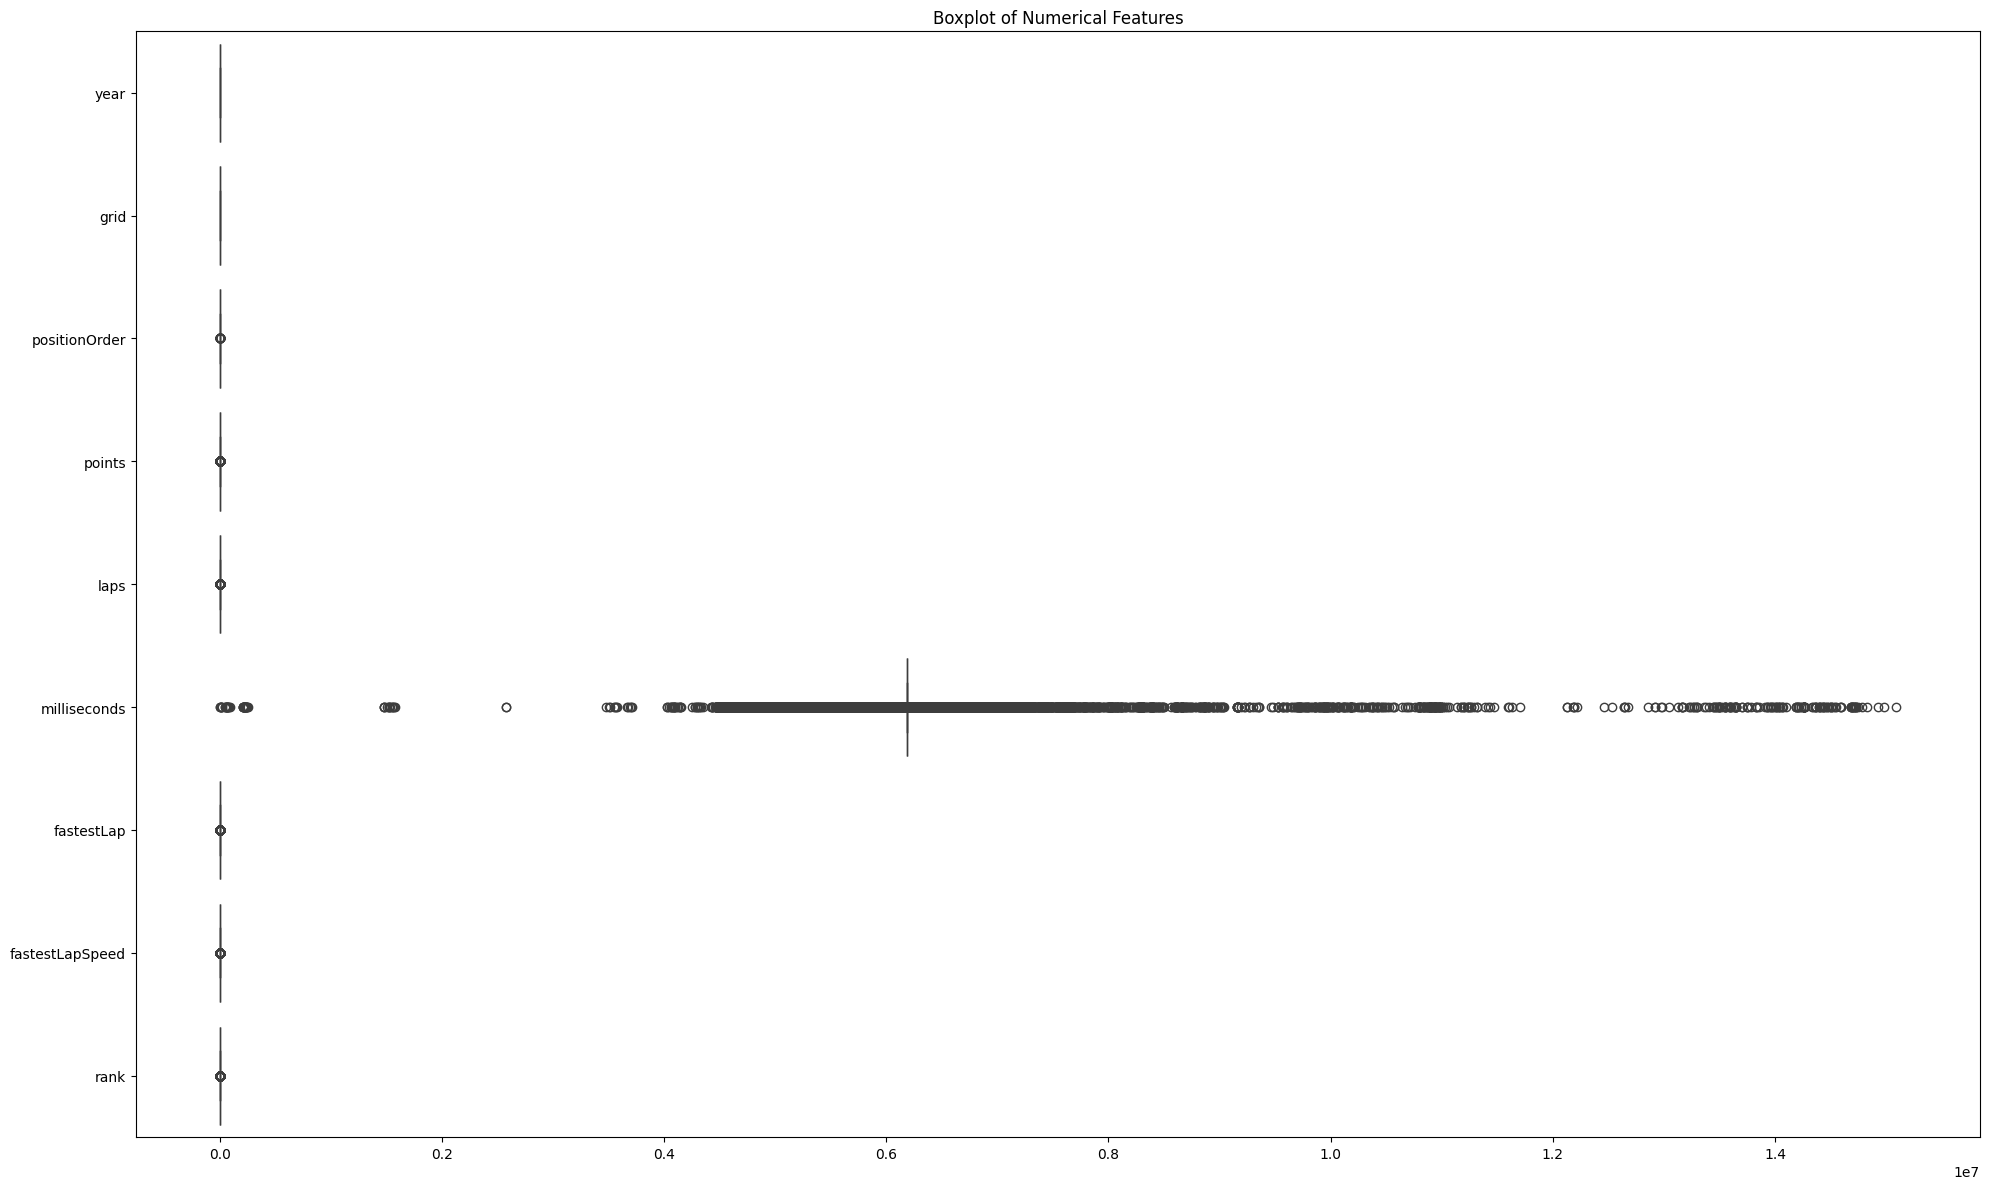

In [60]:
# outliers detection
# Boxplot
plt.figure(figsize=(20, 12))
sns.boxplot(data=df_cleaned[numeric_cols], orient="h")
plt.title("Boxplot of Numerical Features")
plt.tight_layout()
plt.show()


In [61]:
# Loop through each column and compute outlier count
for col in numeric_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df_cleaned[(df_cleaned[col] < lower) | (df_cleaned[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

year: 0 outliers
grid: 0 outliers
positionOrder: 47 outliers
points: 3873 outliers
laps: 254 outliers
milliseconds: 7680 outliers
fastestLap: 379 outliers
fastestLapSpeed: 8252 outliers
rank: 4156 outliers


In [63]:
# handle outlier 
drop_from = ['laps', 'fastestLap']   # hyper-parameters may drop from other features later... 
for col in drop_from:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower) & (df_cleaned[col] <= upper)]

print("Outliers removed from 'laps' and 'fastestLap'")
print(f"New shape of dataset: {df_cleaned.shape}")

Outliers removed from 'laps' and 'fastestLap'
New shape of dataset: (26382, 16)


### `Feature Engineering`

- **feature selection** already done 
- we can consider correlation between each other -> required to be small (avoid redundancy)

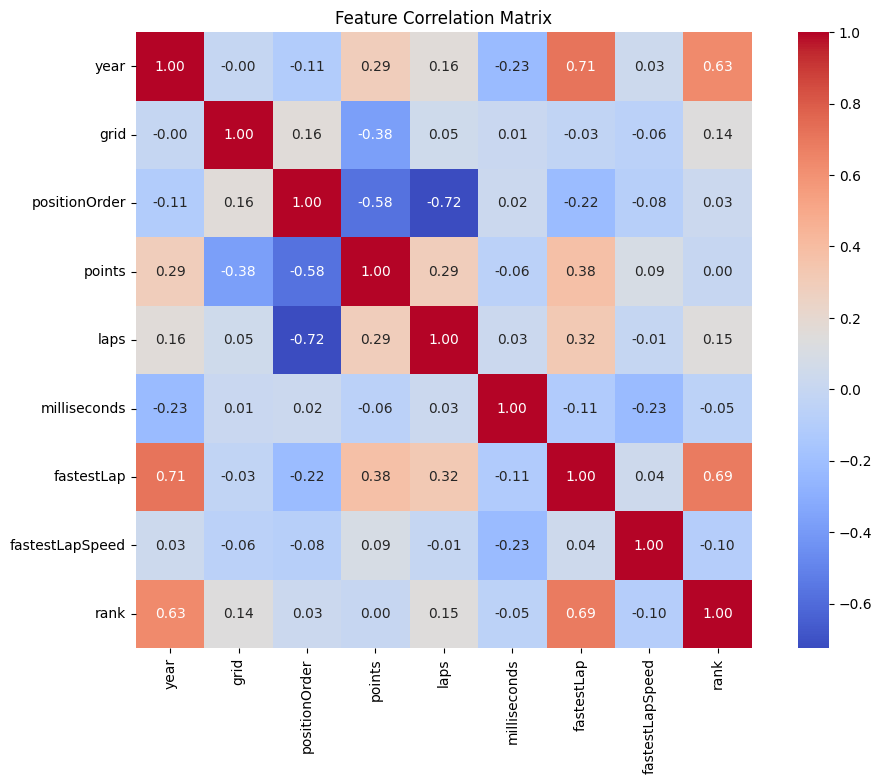

In [65]:
corr_matrix = df_cleaned[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Feature Correlation Matrix")
plt.show()

In [72]:
# Get upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than threshold
threshold = 0.85
to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]
print(f"Highly correlated features: {to_drop}")

Highly correlated features: []


- **feature extraction**

In [75]:
# Positions gained or lost
df_cleaned['position_change'] = df_cleaned['grid'] - df_cleaned['positionOrder']

# Did the driver finish?
df_cleaned['finished'] = df_cleaned['status'] == 'Finished'

In [77]:
# DNF (Did Not Finish) and DNS (Did Not Start)
df_cleaned['dnf'] = ~df_cleaned['finished'] & (df_cleaned['laps'] > 0)
df_cleaned['dns'] = df_cleaned['laps'] == 0

In [87]:
# Podium finish (position 1 to 3)
df_cleaned['podium'] = df_cleaned['positionOrder'].between(1, 3, inclusive='both')

# Fastest lap
df_cleaned['had_fastest_lap'] = df_cleaned['rank'] == '1'

In [88]:
df_cleaned.head(10)

,race,year,date,driver,team,nationality,grid,positionOrder,points,laps,...,fastestLapTime,fastestLapSpeed,rank,status,position_change,finished,dnf,dns,podium,had_fastest_lap
0,Australian Grand Prix,2008,2008-03-16,Lewis Hamilton,McLaren,British,1,1,10.0,58,...,1:27.452,218.300,2,Finished,0,True,False,False,True,False
23879,Monaco Grand Prix,2018,2018-05-27,Lewis Hamilton,Mercedes,German,3,3,15.0,78,...,1:16.270,157.508,8,Finished,0,True,False,False,True,False
23901,Canadian Grand Prix,2018,2018-06-10,Lewis Hamilton,Mercedes,German,4,5,10.0,68,...,1:14.183,211.633,6,Finished,-1,True,False,False,False,False
23917,French Grand Prix,2018,2018-06-24,Lewis Hamilton,Mercedes,German,1,1,25.0,53,...,1:34.509,222.531,5,Finished,0,True,False,False,True,False
23952,Austrian Grand Prix,2018,2018-07-01,Lewis Hamilton,Mercedes,German,2,16,0.0,62,...,1:07.241,231.180,3,Fuel pressure,-14,False,True,False,False,False
23958,British Grand Prix,2018,2018-07-08,Lewis Hamilton,Mercedes,German,1,2,18.0,52,...,1:31.245,232.424,3,Finished,-1,True,False,False,True,False
676,Japanese Grand Prix,2007,2007-09-30,Lewis Hamilton,McLaren,British,1,1,10.0,67,...,1:28.193,186.259,1,Finished,0,True,False,False,True,False
23977,German Grand Prix,2018,2018-07-22,Lewis Hamilton,Mercedes,German,14,1,25.0,67,...,1:15.545,217.968,1,Finished,13,True,False,False,True,False
23997,Hungarian Grand Prix,2018,2018-07-29,Lewis Hamilton,Mercedes,German,1,1,25.0,70,...,1:21.107,194.454,4,Finished,0,True,False,False,True,False
24018,Belgian Grand Prix,2018,2018-08-26,Lewis Hamilton,Mercedes,German,1,2,18.0,44,...,1:46.721,236.264,3,Finished,-1,True,False,False,True,False


### `Descriptive Statistics`

- **per driver**

In [90]:
driver_stats = df_cleaned.groupby('driver').agg({
    'race': 'count',
    'points': ['sum', 'mean'],
    'positionOrder': ['min', 'max', 'mean'],
    'podium': 'sum',
    'had_fastest_lap': 'sum',
    'dnf': 'sum',
}).reset_index()

driver_stats.columns = ['_'.join(col).strip('_') for col in driver_stats.columns]
driver_stats

,driver,race_count,points_sum,points_mean,positionOrder_min,positionOrder_max,positionOrder_mean,podium_sum,had_fastest_lap_sum,dnf_sum
0,Adolf Brudes,1,0.0,0.000000,16,16,16.0,0,0,1
1,Adolfo Cruz,1,0.0,0.000000,16,16,16.0,0,0,1
2,Adrian Sutil,125,104.0,0.832000,4,23,14.712,0,0,85
3,Adrián Campos,21,0.0,0.000000,10,29,20.857143,0,0,16
4,Aguri Suzuki,88,8.0,0.090909,3,38,20.659091,1,0,60
...,...,...,...,...,...,...,...,...,...,...
836,Zsolt Baumgartner,20,1.0,0.050000,8,20,15.3,0,0,20
837,Élie Bayol,7,2.0,0.285714,5,27,15.857143,0,0,6
838,Éric Bernard,47,10.0,0.212766,3,30,15.446809,1,0,41
839,Érik Comas,63,7.0,0.111111,5,30,14.761905,0,0,54


In [96]:
# top 10 preformances
top_10_drivers = driver_stats.sort_values(by='points_sum', ascending=False).head(10)
print(top_10_drivers[['driver', 'points_sum']])

                 driver  points_sum
507      Lewis Hamilton      4716.5
745    Sebastian Vettel      3006.0
553      Max Verstappen      2886.5
249     Fernando Alonso      2283.0
488      Kimi Räikkönen      1846.0
811     Valtteri Bottas      1788.0
748        Sergio Pérez      1566.0
560  Michael Schumacher      1556.0
594        Nico Rosberg      1538.5
128     Charles Leclerc      1347.0


`top 10 preformances`

C:\Users\laphouse\AppData\Local\Temp\ipykernel_34496\2269796762.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_drivers, x='points_sum', y='driver', palette='viridis')


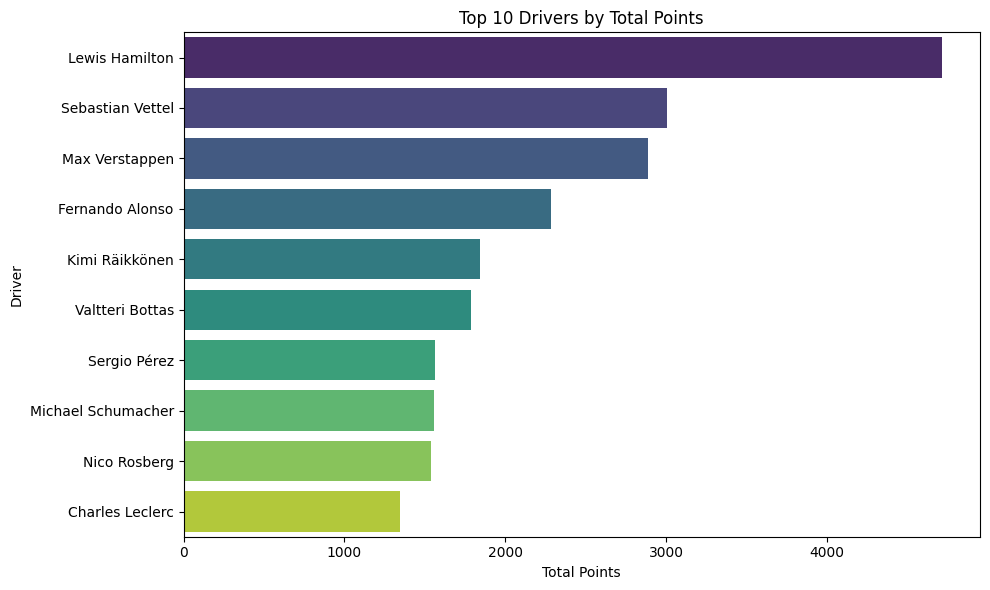

In [98]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_drivers, x='points_sum', y='driver', palette='viridis')
plt.title('Top 10 Drivers by Total Points')
plt.xlabel('Total Points')
plt.ylabel('Driver')
plt.tight_layout()
plt.show()

In [146]:
top_dnf = driver_stats.sort_values(by='dnf_sum', ascending=False).head(10)
top_dnf[["driver", "dnf_sum"]]

,driver,dnf_sum
698,Riccardo Patrese,193
42,Andrea de Cesaris,188
734,Rubens Barrichello,164
388,Jarno Trulli,157
562,Michele Alboreto,155
402,Jenson Button,137
293,Giancarlo Fisichella,137
541,Martin Brundle,136
774,Thierry Boutsen,136
390,Jean Alesi,134


C:\Users\laphouse\AppData\Local\Temp\ipykernel_34496\370181377.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_dnf, x='dnf_sum', y='driver', palette='magma')


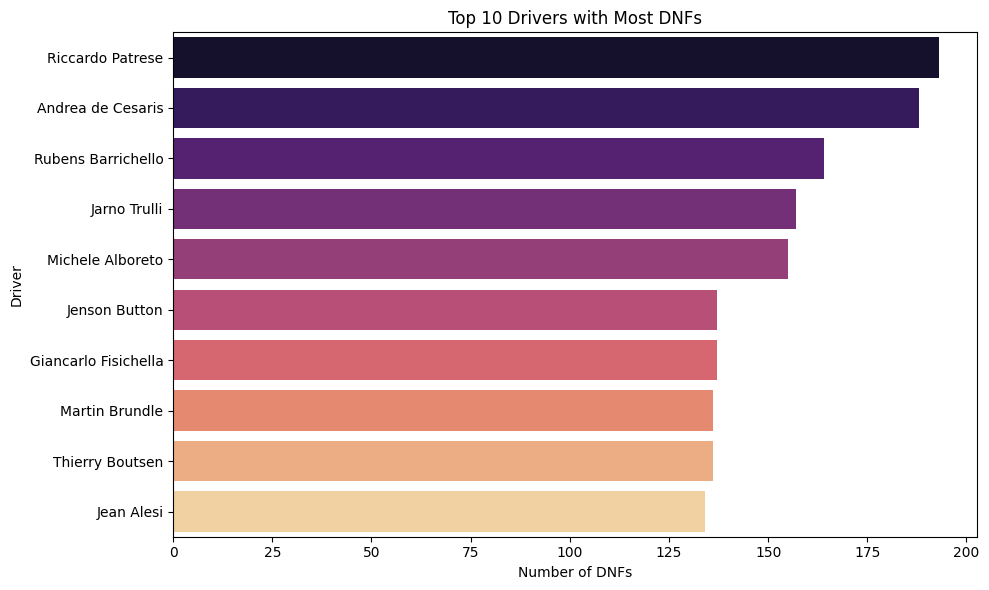

In [ ]:
# drivers with most DNFs
plt.figure(figsize=(10, 6))
sns.barplot(data=top_dnf, x='dnf_sum', y='driver', palette='magma')
plt.title('Top 10 Drivers with Most DNFs')
plt.xlabel('Number of DNFs')
plt.ylabel('Driver')
plt.tight_layout()
plt.show()

- **per race**

In [93]:
race_stats = df_cleaned.groupby(['year', 'race']).agg({
    'driver': 'count',
    'points': 'sum',
    'podium': 'sum',
    'finished': 'mean',
    'had_fastest_lap': 'sum'
}).reset_index()

race_stats.rename(columns={
    'driver': 'num_drivers',
    'points': 'total_points',
    'podium': 'podium_finishes',
    'finished': 'finish_rate',
    'had_fastest_lap': 'fastest_laps'
}, inplace=True)

race_stats

,year,race,num_drivers,total_points,podium_finishes,finish_rate,fastest_laps
0,1950,Belgian Grand Prix,14,24.0,3,0.285714,0
1,1950,British Grand Prix,23,24.0,3,0.130435,0
2,1950,French Grand Prix,20,24.0,3,0.100000,0
3,1950,Indianapolis 500,20,0.0,0,0.000000,0
4,1950,Italian Grand Prix,29,24.0,4,0.137931,0
...,...,...,...,...,...,...,...
1120,2024,Saudi Arabian Grand Prix,20,102.0,3,0.600000,0
1121,2024,Singapore Grand Prix,20,101.0,3,0.350000,0
1122,2024,Spanish Grand Prix,20,102.0,3,0.550000,0
1123,2024,São Paulo Grand Prix,20,102.0,3,0.750000,0


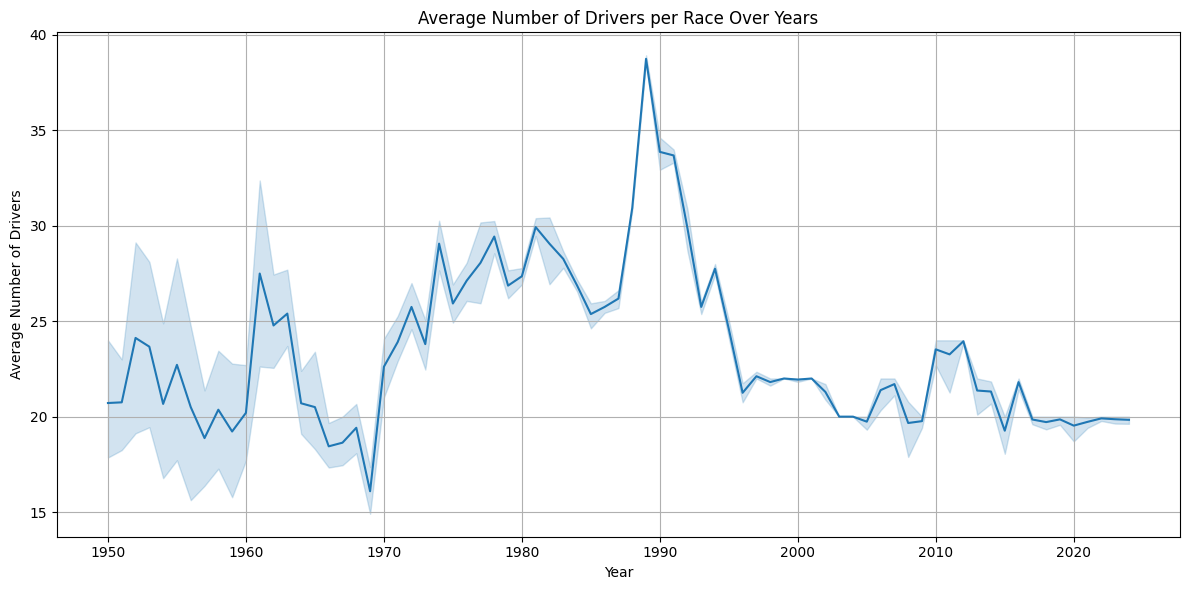

In [ ]:
# Number of Drivers per Race Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=race_stats, x='year', y='num_drivers', estimator='mean')
plt.title('Average Number of Drivers per Race Over Years')
plt.xlabel('Year')
plt.ylabel('Average Number of Drivers')
plt.grid(True)
plt.tight_layout()
plt.show()

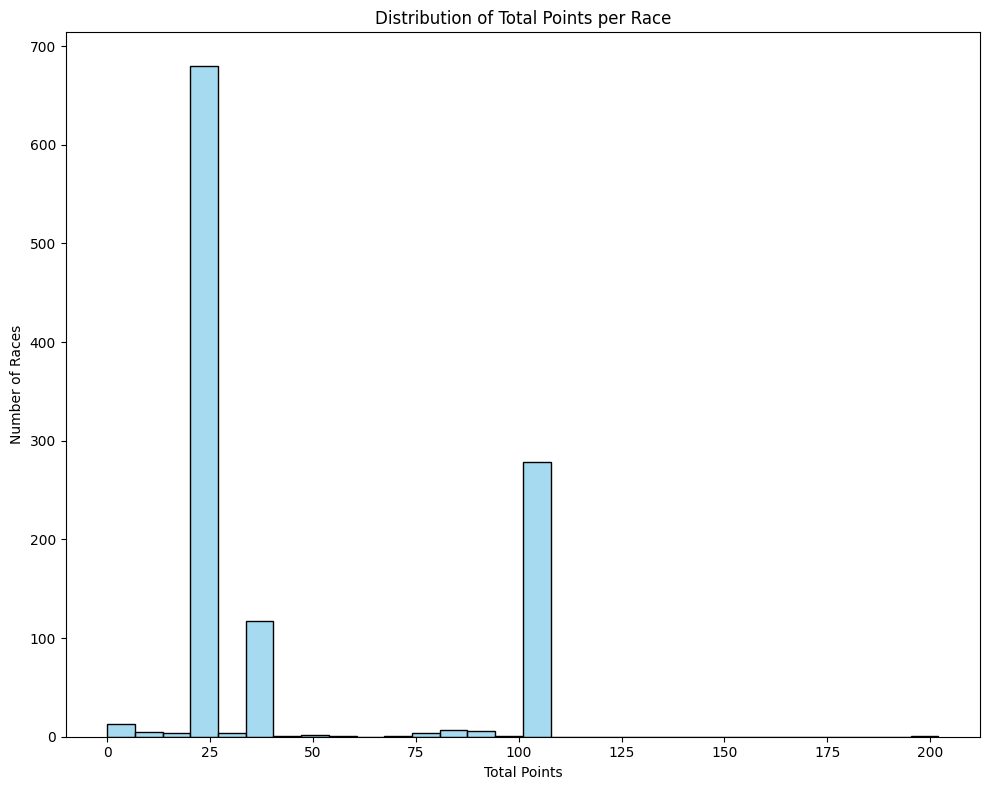

In [ ]:
# Total Points per Race (Distribution)
plt.figure(figsize=(10,8 ))
sns.histplot(race_stats['total_points'], bins=30, color='skyblue')
plt.title('Distribution of Total Points per Race')
plt.xlabel('Total Points')
plt.ylabel('Number of Races')
plt.tight_layout()
plt.show()


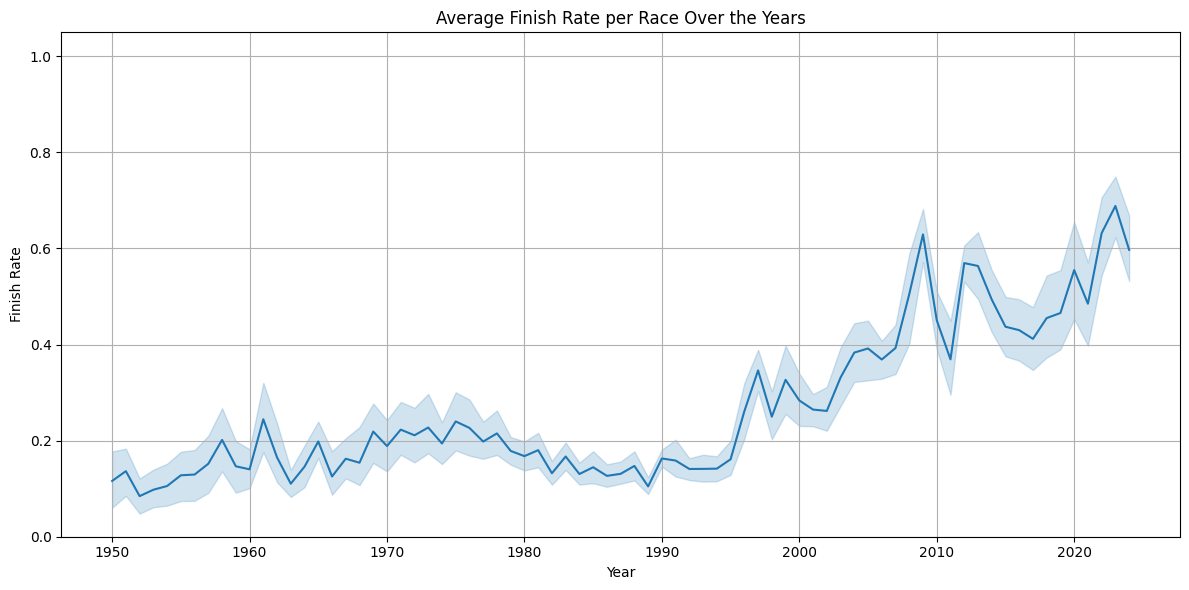

In [ ]:
# Finish Rate Over the Years 
plt.figure(figsize=(12, 6))
sns.lineplot(data=race_stats, x='year', y='finish_rate', estimator='mean')
plt.title('Average Finish Rate per Race Over the Years')
plt.xlabel('Year')
plt.ylabel('Finish Rate')
plt.ylim(0, 1.05)
plt.grid(True)
plt.tight_layout()
plt.show()

- **per team**

In [111]:
# top 10 teams (the most poinyts per start)
team_efficiency = df_cleaned.groupby('team').agg({
    'race': 'count',
    'points': 'sum'
}).reset_index()

team_efficiency['points_per_start'] = team_efficiency['points'] / team_efficiency['race']

top_teams = team_efficiency.sort_values(by='points_per_start', ascending=False).head(10)

C:\Users\laphouse\AppData\Local\Temp\ipykernel_34496\4014070014.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_teams, x='team', y='points_per_start', palette='viridis')


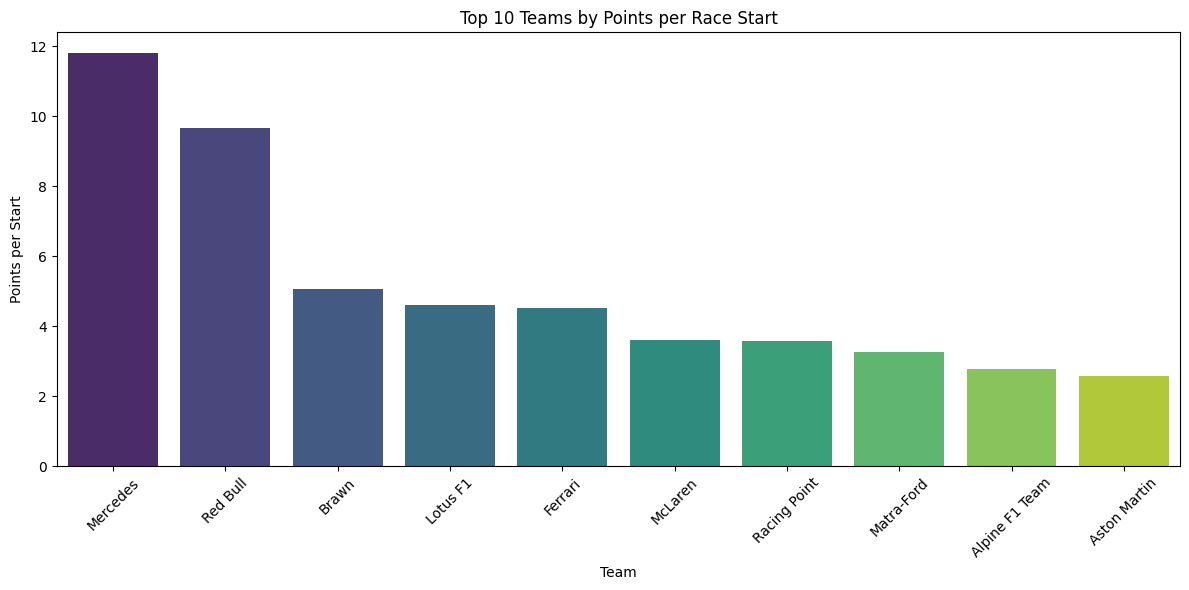

In [112]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_teams, x='team', y='points_per_start', palette='viridis')
plt.title('Top 10 Teams by Points per Race Start')
plt.xlabel('Team')
plt.ylabel('Points per Start')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

`Reliablity analysis`

In [ ]:
# Count DNFs per year
dnf_by_year = df_cleaned[df_cleaned['dnf']].groupby('year').size().reset_index(name='dnf_count')

# Common causes 
dnf_causes = df_cleaned[df_cleaned['dnf']].groupby('status').size().sort_values(ascending=False).head(10)

In [120]:
# top ten years
dnf_by_year.sort_values(by= "dnf_count").head(10)

,year,dnf_count
59,2009,108
0,1950,115
7,1957,117
73,2023,126
5,1955,128
16,1966,128
9,1959,129
6,1956,130
11,1961,132
19,1969,132


C:\Users\laphouse\AppData\Local\Temp\ipykernel_34496\3050958687.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dnf_by_year, x='year', y='dnf_count', palette='Reds')


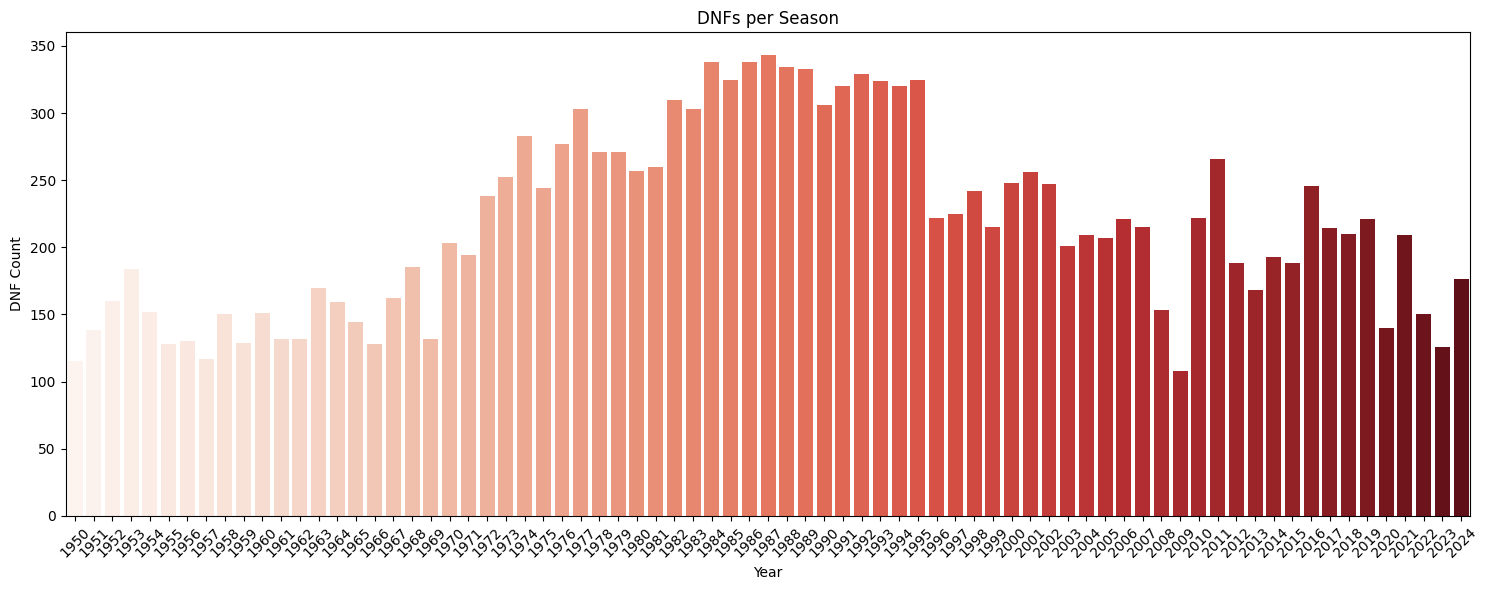

In [117]:
plt.figure(figsize=(15, 6))
sns.barplot(data=dnf_by_year, x='year', y='dnf_count', palette='Reds')
plt.title('DNFs per Season')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('DNF Count')
plt.tight_layout()
plt.show()

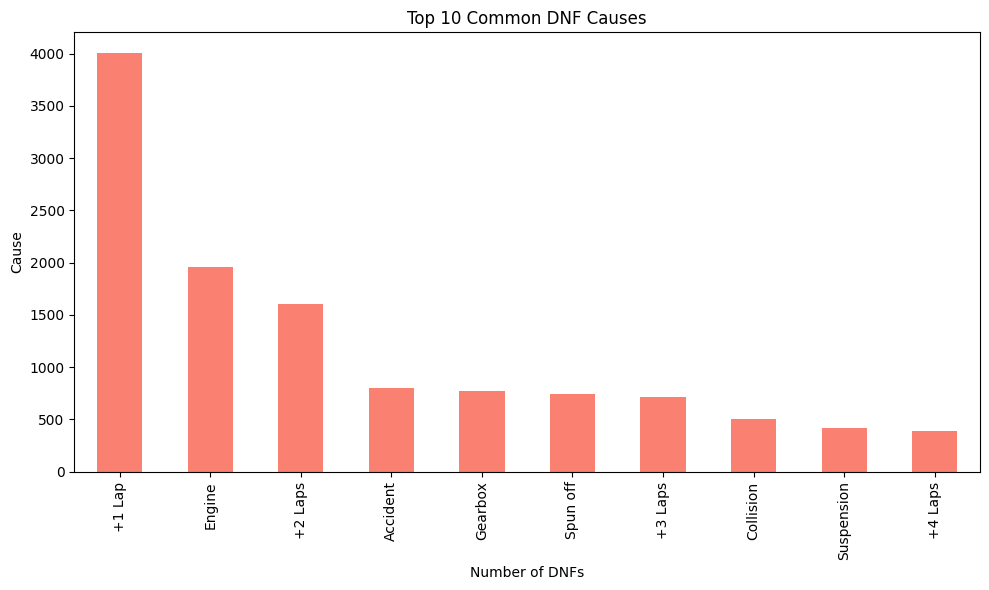

In [123]:
# top 10 DNF causes
plt.figure(figsize=(10, 6))
dnf_causes.plot(kind='bar', color='salmon')
plt.title('Top 10 Common DNF Causes')
plt.xlabel('Number of DNFs')
plt.ylabel('Cause')
plt.tight_layout()
plt.show()

`Worst Performers – Most Positions Lost`
- if position order is higher than grid, means the driver lost his position

In [138]:
# comute difference between start (grid) and the position order
df_cleaned['positions_lost'] = df_cleaned['positionOrder'] - df_cleaned['grid']

# Filter: started (grid > 0), finished (positionOrder > 0), and actually lost positions (position > grid)
valid_losses = df_cleaned[
    (df_cleaned['grid'] > 0) &
    (df_cleaned['positionOrder'] > 0) &
    (df_cleaned['positions_lost'] > 0)
]

# Aggregate and sort by most positions lost
worst_drivers = (valid_losses.groupby('driver')['positions_lost'].sum().sort_values(ascending=False).head(10).reset_index())

In [142]:
worst_drivers

,driver,positions_lost
0,Riccardo Patrese,1326
1,Gerhard Berger,1232
2,Nigel Mansell,1117
3,Michael Schumacher,1035
4,Rubens Barrichello,986
5,Nelson Piquet,980
6,Jarno Trulli,900
7,Ayrton Senna,899
8,Alain Prost,894
9,Kimi Räikkönen,885


C:\Users\laphouse\AppData\Local\Temp\ipykernel_34496\977477509.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=worst_drivers, x='positions_lost', y='driver', palette='coolwarm')


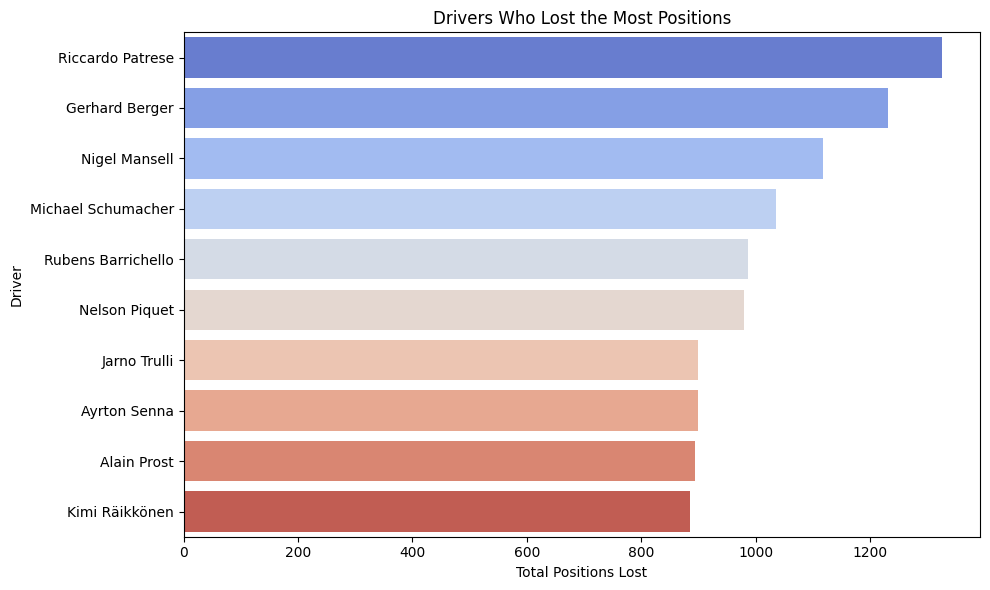

In [139]:
plt.figure(figsize=(10, 6))
sns.barplot(data=worst_drivers, x='positions_lost', y='driver', palette='coolwarm')
plt.title('Drivers Who Lost the Most Positions')
plt.xlabel('Total Positions Lost')
plt.ylabel('Driver')
plt.tight_layout()
plt.show()

* ### Some of these drivers also rank among those with the highest DNFs, reinforcing the case for labeling them as the weakest overall performers:

   **Riccardo Patrese**, **Rubens Barrichello**, **Jarno Trulli**.



`Era Comparison – Driver Performance Across Decades`

In [140]:
df_cleaned['decade'] = (df_cleaned['year'] // 10) * 10
decade_perf = df_cleaned.groupby(['decade', 'driver'])['points'].sum().reset_index()

top_per_driver = decade_perf.groupby('decade').apply(lambda d: d.sort_values('points', ascending=False).head(3)).reset_index(drop=True)

C:\Users\laphouse\AppData\Local\Temp\ipykernel_34496\2809278806.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_per_driver = decade_perf.groupby('decade').apply(lambda d: d.sort_values('points', ascending=False).head(3)).reset_index(drop=True)


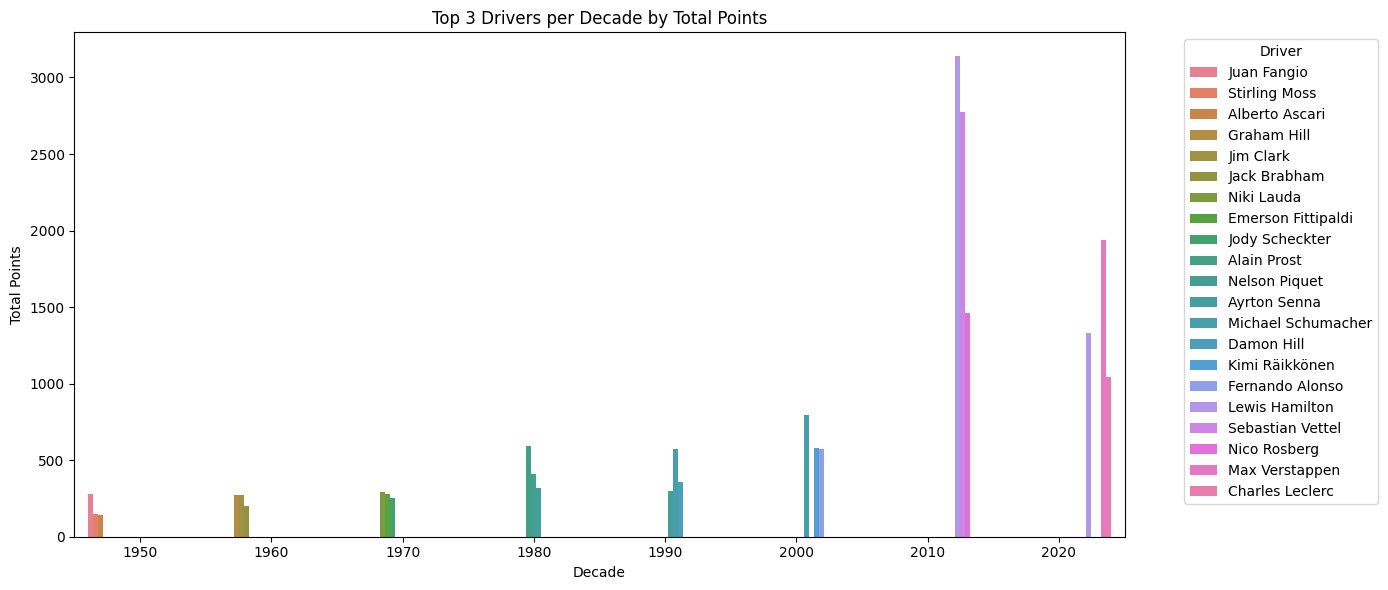

In [141]:
plt.figure(figsize=(14, 6))
sns.barplot(data=top_per_driver, x='decade', y='points', hue='driver')
plt.title('Top 3 Drivers per Decade by Total Points')
plt.ylabel('Total Points')
plt.xlabel('Decade')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- ### Over time, the total points have increased significantly, ig due to changes in the scoring system.


## `preprocessing` 

In [148]:
# map true to 1 and false to 0
df_cleaned['podium'] = df_cleaned['podium'].astype(int)
df_cleaned['finished'] = df_cleaned['finished'].astype(int)
df_cleaned['dnf'] = df_cleaned['dnf'].astype(int)
df_cleaned['dns'] = df_cleaned['dns'].astype(int)

In [147]:
# to be continued ...